In [693]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\jojic\\OneDrive\\Desktop\\mljourney\\pandas-works\\customer-behavior-casestudy\\E-commerce Customer Behavior - Sheet1.csv")
print(df.head())
df.columns

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [694]:
df.rename(columns={"Customer ID":"customer_id","Gender":"gender","Age":"age","City":"city","Membership Type":"membership_type","Total Spend":"total_spend","Items Purchased":"items_purchased","Average Rating":"average_rating","Discount Applied":"discount_applied","Days Since Last Purchase":"days_since_last_purchase","Satisfaction Level":"satisfaction_level"},inplace=True)
df.isnull().sum()

customer_id                 0
gender                      0
age                         0
city                        0
membership_type             0
total_spend                 0
items_purchased             0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          2
dtype: int64

In [695]:
df["satisfaction_level"]=df["average_rating"].apply(lambda x:"unsatisfied" if x<=4.0 else "neutral" if x>4.0 and x<4.5 else "satisfied")
#df["satisfaction_level"].fillna(df["satisfaction_level"].mode()[0],inplace=True)
print(df.head())
df.isnull().sum()

   customer_id  gender  age           city membership_type  total_spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   items_purchased  average_rating  discount_applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   days_since_last_purchase satisfaction_level  
0                        25          satisfied  
1                        18            neutral  
2                        42        unsatisfied  
3               

customer_id                 0
gender                      0
age                         0
city                        0
membership_type             0
total_spend                 0
items_purchased             0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          0
dtype: int64

gender
Female    175
Male      175
Name: count, dtype: int64


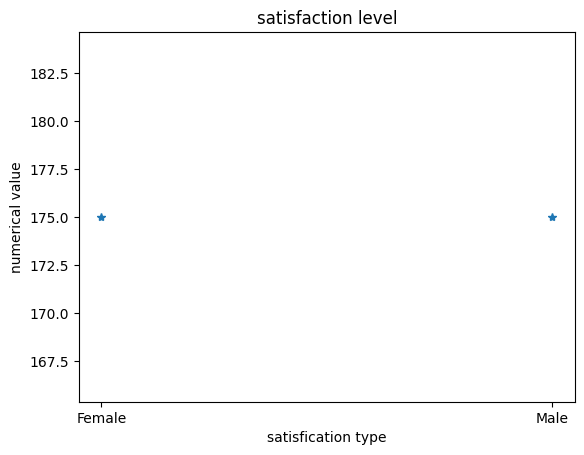

In [696]:
gender_count=df["gender"].value_counts()
print(gender_count)
plt.plot(gender_count,marker="*",linestyle="none")
plt.title("satisfaction level")
plt.xlabel("satisfication type")
plt.ylabel("numerical value")
plt.show()

In [697]:
df["age"].mean().astype("int")

np.int64(33)

In [698]:
df["membership_type"].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

membership_type
Gold      117
Silver    117
Bronze    116
Name: count, dtype: int64


Text(0, 0.5, 'num value')

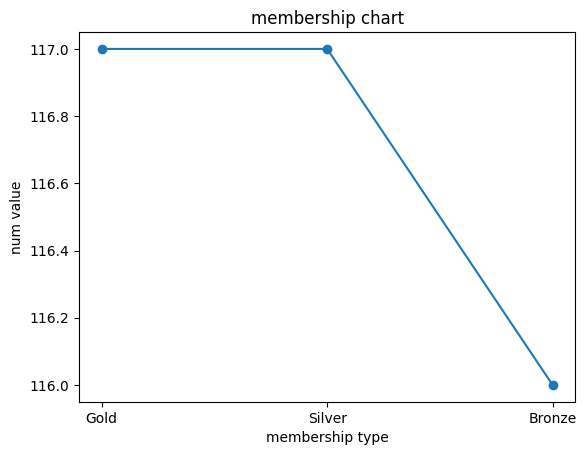

In [699]:
member_type=df["membership_type"].value_counts()
print(member_type)
plt.plot(member_type,marker="o")
plt.title("membership chart")
plt.xlabel("membership type")
plt.ylabel("num value")

membership_type
Bronze     54913.1
Gold      153403.9
Silver     87566.6
Name: total_spend, dtype: float64


Text(0, 0.5, 'Spend amount')

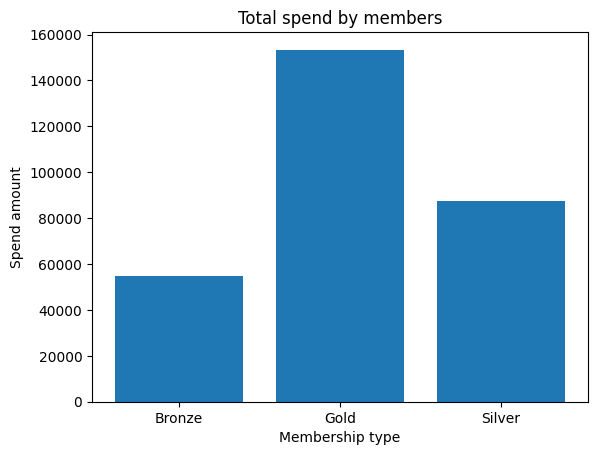

In [700]:
mem_spend=df.groupby("membership_type")["total_spend"].sum()
print(mem_spend)
plt.bar(mem_spend.index,mem_spend.values)
plt.title("Total spend by members")
plt.xlabel("Membership type")
plt.ylabel("Spend amount")

In [701]:
df[df["membership_type"]=="Gold"]

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,neutral
...,...,...,...,...,...,...,...,...,...,...,...
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,satisfied
341,442,Female,31,New York,Gold,1140.6,15,4.5,True,36,satisfied
344,445,Male,28,San Francisco,Gold,1480.1,21,4.9,False,13,satisfied


In [702]:
df[df["average_rating"]>4.5]

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,satisfied
15,116,Male,29,San Francisco,Gold,1360.2,18,4.9,False,11,satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,satisfied
...,...,...,...,...,...,...,...,...,...,...,...
326,427,Male,30,San Francisco,Gold,1450.5,19,4.6,False,14,satisfied
332,433,Male,28,San Francisco,Gold,1490.1,21,4.9,False,11,satisfied
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,satisfied


city
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64


Text(0, 0.5, 'count')

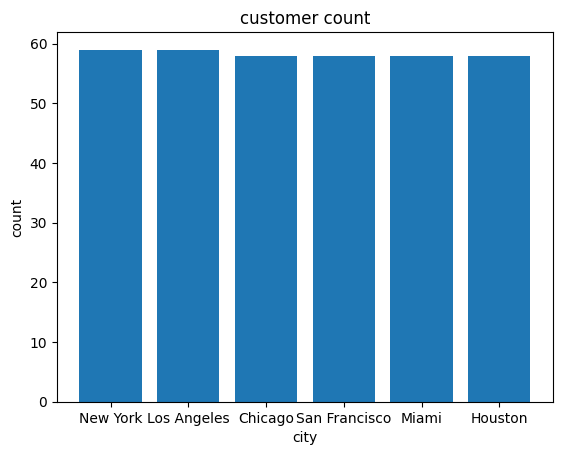

In [703]:
cust_num=df["city"].value_counts()
print(cust_num)
plt.bar(cust_num.index,cust_num.values)
plt.title("customer count")
plt.xlabel("city")
plt.ylabel("count")

city
Chicago          28993.2
Houston          25919.9
Los Angeles      47524.0
Miami            40042.6
New York         68737.1
San Francisco    84666.8
Name: total_spend, dtype: float64


Text(0, 0.5, 'spend')

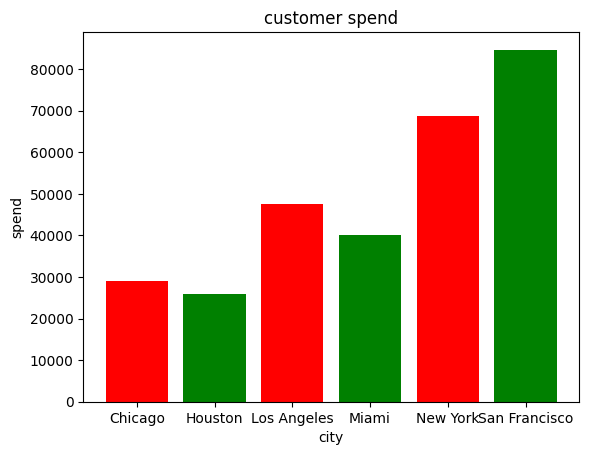

In [704]:
city_spend=df.groupby("city")["total_spend"].sum()
print(city_spend)
plt.bar(city_spend.index,city_spend.values,color=("red","green"))
plt.title("customer spend")
plt.xlabel("city")
plt.ylabel("spend")

([<matplotlib.patches.Wedge at 0x2ba1a4c5710>,
 [Text(1.0482892953801437, 0.3333009948851073, 'Chicago'),
  Text(0.6915931686830732, 0.8553939963729618, 'Houston'),
  Text(-0.10970201354560376, 1.094516088609044, 'Los Angeles'),
  Text(-0.9428293511093423, 0.5666328746964271, 'Miami'),
  Text(-0.8991876248554197, -0.633609986748054, 'New York'),
  Text(0.684663489670123, -0.860950582735577, 'San Francisco')])

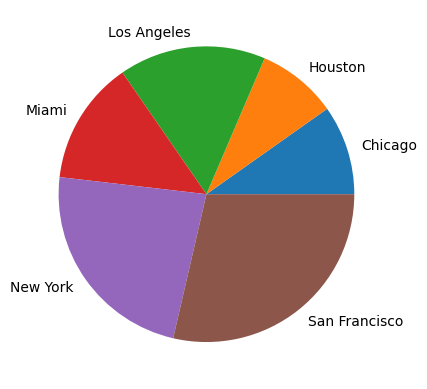

In [705]:
city_spend=df.groupby("city")["total_spend"].sum()
plt.pie(city_spend,labels=city_spend.index)

city
Chicago          3.456897
Houston          3.193103
Los Angeles      4.172881
Miami            3.927586
New York         4.544068
San Francisco    4.808621
Name: average_rating, dtype: float64


<BarContainer object of 6 artists>

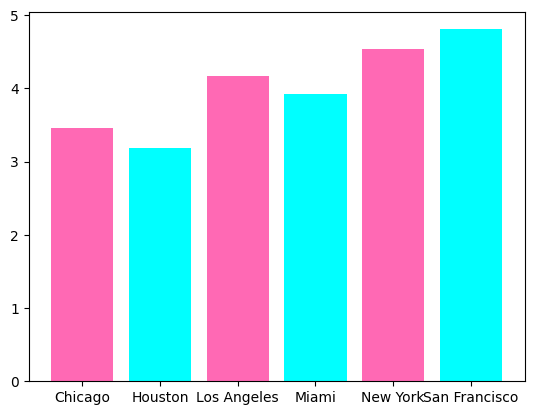

In [706]:
city_avg=df.groupby("city")["average_rating"].mean()
print(city_avg)
plt.bar(city_avg.index,city_avg.values,color=("hotpink","cyan"))